In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from collections import Counter

In [84]:
df = pd.read_csv("creditcard.csv[1].crdownload")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [85]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [86]:
df.dropna(inplace = True)

In [87]:
df.isnull().values.any()

False

In [88]:
df['Amount'].describe()

count    11664.000000
mean        62.795132
std        179.816783
min          0.000000
25%          5.000000
50%         15.950000
75%         50.000000
max       7712.430000
Name: Amount, dtype: float64

In [89]:
non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])
fraud_precentage = (fraud/(fraud+non_fraud)) * 100
print("Number of genuine transactions: ",non_fraud)
print("Number of non genuine ttransactions: ",fraud)
print("Percentage of fraud transactions: ",fraud_precentage)

Number of genuine transactions:  11615
Number of non genuine ttransactions:  49
Percentage of fraud transactions:  0.4200960219478738


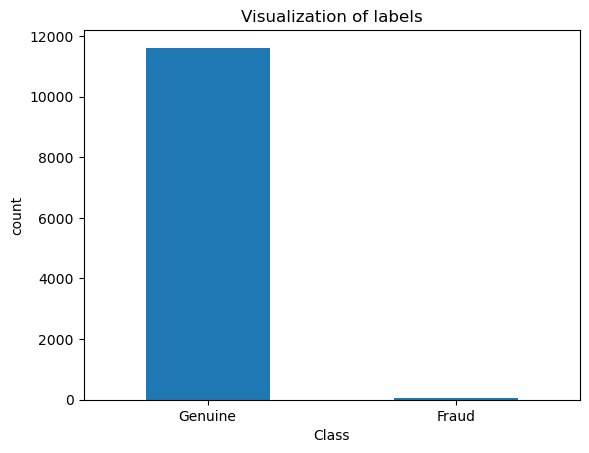

In [90]:
labels = ['Genuine', 'Fraud']
count = df.value_counts(df['Class'],sort = True)
count.plot(kind = 'bar',rot = 0)
plt.title("Visualization of labels")
plt.ylabel('count')
plt.xticks(range(2),labels)
plt.show()

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['NormalizedAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(["Amount","Time"],inplace = True,axis =1)

In [104]:
Y = df['Class']
X = df.drop(["Class"],axis = 1)

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [112]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8164, 29)
(3500, 29)
(8164,)
(3500,)


In [117]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators= 100)
random.fit(X_train,Y_train)

RandomForestClassifier()

In [118]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train,Y_train)

DecisionTreeClassifier()

In [126]:
dt_pred = decision.predict(X_test)
score = decision.score(X_test,Y_test)*100
score
print("Decision Tree score: ",score)

Decision Tree score:  99.85714285714286


In [127]:
rf_pred = random.predict(X_test)
score = random.score(X_test,Y_test)*100
print("Random Forest score: ", score)

Random Forest score:  99.91428571428571


In [130]:
dt_pred[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [131]:
rf_pred[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [142]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [143]:
confusion_matrix_dt = confusion_matrix(Y_test,dt_pred.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[3481    3]
 [   2   14]]


In [144]:
confusion_matrix_rf = confusion_matrix(Y_test, rf_pred.round())
print("Confusion Matrix - RandomForest")
print(confusion_matrix_rf)

Confusion Matrix - RandomForest
[[3483    1]
 [   2   14]]


In [145]:
metrics(Y_test, dt_pred)

Accuracy: 0.99857
Precision: 0.82353
Recall: 0.87500
F1-score: 0.84848
